In [153]:
import torch
from torch import nn
import torch.autograd

from torchviz import make_dot  # https://github.com/szagoruyko/pytorchviz

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import IPython.display as disp

import pprint

### Initialise things

In [2]:
device = torch.device("cuda:0")
pp = pprint.PrettyPrinter(indent=4)

### Display functions 

In [3]:
def tinfo(tensor, name=None):
    if name is not None:
        print("{}:".format(name))
        print("------------------")
    disp.display(tensor.shape)
    disp.display(tensor.dtype)
    disp.display(tensor.device)
    print("------------------")
    disp.display(tensor)
    print()

# Simple computation graph example 

In [4]:
# Tensors:
# Note: wrapped in nn.Parameter(...) only because that allows printing the paramter name on the computational graph, not necessary for computation.
x = nn.Parameter(torch.tensor([[1, 2, 3, 4, 5]], dtype=float, requires_grad=True))
W = nn.Parameter(torch.tensor(np.array([[10, 10], [20, 20], [30, 30], [40, 40], [50, 50]]), dtype=float, requires_grad=True))
b = nn.Parameter(torch.tensor([1.2, 1.2], dtype=float, requires_grad=True))

tinfo(x, "x")
tinfo(W, "W")
tinfo(b, "b")

# Define computations:
xW = torch.mm(x, W)
z = xW + b
o = torch.log(z)

tinfo(xW, "xW = torch.mm(x, W)")
tinfo(z, "z = xW + b")
tinfo(o, "o = torch.log(z)")

x:
------------------


torch.Size([1, 5])

torch.float64

device(type='cpu')

------------------


Parameter containing:
tensor([[1., 2., 3., 4., 5.]], dtype=torch.float64, requires_grad=True)


W:
------------------


torch.Size([5, 2])

torch.float64

device(type='cpu')

------------------


Parameter containing:
tensor([[10., 10.],
        [20., 20.],
        [30., 30.],
        [40., 40.],
        [50., 50.]], dtype=torch.float64, requires_grad=True)


b:
------------------


torch.Size([2])

torch.float64

device(type='cpu')

------------------


Parameter containing:
tensor([1.2000, 1.2000], dtype=torch.float64, requires_grad=True)


xW = torch.mm(x, W):
------------------


torch.Size([1, 2])

torch.float64

device(type='cpu')

------------------


tensor([[550., 550.]], dtype=torch.float64, grad_fn=<MmBackward>)


z = xW + b:
------------------


torch.Size([1, 2])

torch.float64

device(type='cpu')

------------------


tensor([[551.2000, 551.2000]], dtype=torch.float64, grad_fn=<AddBackward0>)


o = torch.log(z):
------------------


torch.Size([1, 2])

torch.float64

device(type='cpu')

------------------


tensor([[6.3121, 6.3121]], dtype=torch.float64, grad_fn=<LogBackward>)

In [5]:
# Name the parameters
params = {"x": x, "W": W, "b": b}

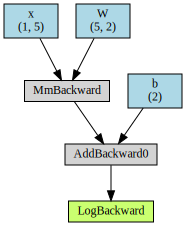

In [6]:
# Display graph:
make_dot(o, params=params)

# Model Example
* From https://github.com/szagoruyko/pytorchviz/blob/master/examples.ipynb

{   'W0.bias': Parameter containing:
tensor([ 0.1590, -0.2175, -0.2235, -0.0259,  0.2931,  0.2557,  0.0117,  0.1236,
        -0.0382,  0.1289,  0.0328,  0.1226,  0.1176, -0.3261,  0.1358, -0.1046],
       requires_grad=True),
    'W0.weight': Parameter containing:
tensor([[-0.0913, -0.2071, -0.2630, -0.3367,  0.1246,  0.1604,  0.0104,  0.0788],
        [ 0.0900,  0.2517, -0.0817, -0.2698,  0.0956, -0.0077, -0.1466, -0.0769],
        [ 0.1123, -0.2928, -0.0593,  0.3368, -0.1117, -0.2846, -0.2119, -0.1710],
        [ 0.2522,  0.2577, -0.3194, -0.2036, -0.0273, -0.0390, -0.0449,  0.1456],
        [-0.0310,  0.2189, -0.0847,  0.2254, -0.1610,  0.1431, -0.1149, -0.1830],
        [-0.2147, -0.2264, -0.1298, -0.1995,  0.1776, -0.0268, -0.2895, -0.2390],
        [-0.0563,  0.0498, -0.3320, -0.2807,  0.0546,  0.0796,  0.3066, -0.3208],
        [-0.3176,  0.0409,  0.0227, -0.2556,  0.2151, -0.1925, -0.2343,  0.1027],
        [ 0.0056, -0.2371,  0.0369, -0.1777, -0.0077,  0.1312,  0.0972, -0.1054

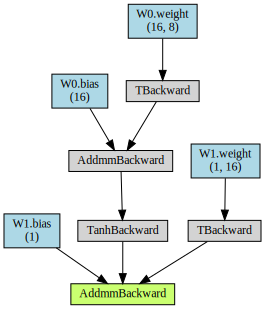

In [7]:
model = nn.Sequential()
model.add_module('W0', nn.Linear(8, 16))
model.add_module('tanh', nn.Tanh())
model.add_module('W1', nn.Linear(16, 1))

x = torch.randn(1,8)

params_dict = dict(model.named_parameters())
pp.pprint(params_dict)

make_dot(model(x), params=params_dict)

# Implement gradient descent

array([0.        , 0.6981317 , 1.3962634 , 2.0943951 , 2.7925268 ,
       3.4906585 , 4.1887902 , 4.88692191, 5.58505361, 6.28318531])

array([ 0.00000000e+00,  6.42787610e-01,  9.84807753e-01,  8.66025404e-01,
        3.42020143e-01, -3.42020143e-01, -8.66025404e-01, -9.84807753e-01,
       -6.42787610e-01, -2.44929360e-16])

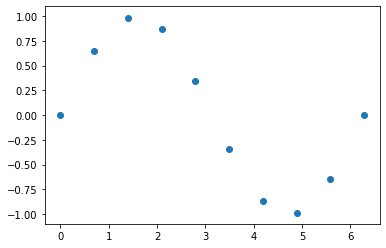

In [171]:
# Data:
x_np = np.linspace(0, 2 * np.pi, 10)
y_np = np.sin(x_np)
disp.display(x_np, y_np)
plt.scatter(x_np, y_np)

In [172]:
# Model.

class Model(nn.Module):
    
    def __init__(self):
        super(Model, self).__init__()
        self.W1 = nn.Linear(10, 10)
        self.b = nn.Parameter(torch.tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=torch.float32, requires_grad=True))
    
    def forward(self, x):
        return self.W1(x) + self.b

In [173]:
# Loss.
def mse(y, t):
    return torch.mean((y - t)**2)
def mse_np(y, t):
    return np.mean((y - t)**2)

{   'W1.bias': Parameter containing:
tensor([ 0.1024,  0.2973, -0.1000,  0.0311, -0.1932,  0.0698,  0.0526, -0.1425,
         0.2366, -0.0184], requires_grad=True),
    'W1.weight': Parameter containing:
tensor([[ 0.0985, -0.1252, -0.0127,  0.1754,  0.2643,  0.2726, -0.1516,  0.2868,
         -0.0756, -0.0566],
        [ 0.2853,  0.0434, -0.2289, -0.1854,  0.0088, -0.0095,  0.0122, -0.0969,
         -0.0331,  0.0832],
        [ 0.1232,  0.2033,  0.2600,  0.1464, -0.0337, -0.2704,  0.2654,  0.1793,
          0.2982,  0.0610],
        [ 0.0800,  0.1068,  0.2465,  0.2010,  0.1430, -0.0591, -0.1603,  0.0520,
          0.2033, -0.0085],
        [ 0.2771, -0.2118,  0.1747,  0.0674, -0.2107,  0.1451, -0.1827,  0.2180,
          0.1735, -0.2823],
        [ 0.1628,  0.0504,  0.1518,  0.1526, -0.0462, -0.1234, -0.0647, -0.1117,
         -0.2831,  0.1207],
        [-0.1376,  0.0781, -0.0803,  0.2259,  0.0231, -0.2933, -0.0008, -0.0472,
         -0.1659,  0.2709],
        [ 0.0573, -0.0979, -0.311

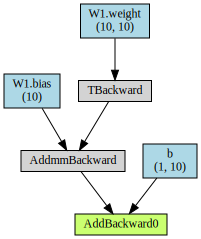

In [174]:
# Show computation graph.

x = torch.tensor([list(x_np)], dtype=torch.float32, requires_grad=False)  # requires_grad=True not needed?
y = torch.tensor([list(y_np)], dtype=torch.float32, requires_grad=False)

torch.manual_seed(9)
model = Model()

params_dict = dict(list(model.named_parameters()) + [("x", x)])
pp.pprint(params_dict)

make_dot(model(x), params=params_dict)

MSE = 4.968679167095369


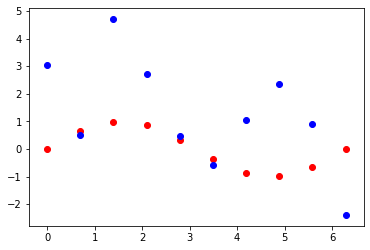

In [175]:
# Initial "prediction".

y_pred = model(x).squeeze().detach().numpy()

def show_plot(x, y, y_pred, ylim=(-1., 1.), print_mse=True):
    # print(y, y_pred)
    plt.cla()
    plt.scatter(x, y, color="red")
    plt.scatter(x, y_pred, color="blue")
    plt.ylim(ylim)
    if print_mse:
        print("MSE = {}".format(mse_np(y_pred, y)))

show_plot(x_np, y_np, y_pred, ylim=None)

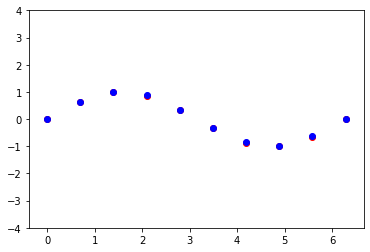

------------------------------
it 20:
------------------------------

>>> y_pred:
tensor([[ 0.0056,  0.6426,  0.9917,  0.8695,  0.3422, -0.3424, -0.8625, -0.9786,
         -0.6399, -0.0044]], grad_fn=<AddBackward0>)
>>> y:
tensor([[ 0.0000e+00,  6.4279e-01,  9.8481e-01,  8.6603e-01,  3.4202e-01,
         -3.4202e-01, -8.6603e-01, -9.8481e-01, -6.4279e-01, -2.4493e-16]])
>>> mse = 1.7112246496253647e-05


In [176]:
# Implement GD.

VERB = False
use_manual_gd = True

torch.manual_seed(9)
model = Model()

iters = 20
lr = 0.01

opt = torch.optim.SGD(model.parameters(), lr=lr, momentum=0)

for it in range(iters):
    
    print("------------------------------\nit {}:\n------------------------------\n".format(it + 1))
    
    # Zero the gradients.
    with torch.no_grad():
        for name, parameter in model.named_parameters():
            if parameter.grad is not None:
                parameter.grad.data.zero_()
    
    for name, parameter in model.named_parameters():
        if VERB:
            if name == "b":
                print("\n{}:\n---\n".format(name))
                print("AT THE START")
                print(parameter)
                print()
    
    # Compute loss.
    y_pred = model(x)
    
    print(">>> y_pred:")
    print(y_pred)
    
    print(">>> y:")
    print(y)
    
    mse_loss = mse(y_pred, y)
    
    print(">>> mse = {}".format(mse_loss))
    
    # Backprop.
    mse_loss.backward(torch.tensor(1.))
    
    # Gradient descent.
    if use_manual_gd is False:
        for name, parameter in model.named_parameters():
            if VERB:
                if name == "b":
                    print("\n{}:\n---\n".format(name))
                    print("BEFORE")
                    print(parameter)
                    print("GRAD")
                    print(parameter.grad)
        opt.step()
        for name, parameter in model.named_parameters():
            if VERB:
                if name == "b":
                    print("\n{}:\n---\n".format(name))
                    print("AFTER")
                    print(parameter)
    
    if use_manual_gd is True:
        with torch.no_grad():  # Do not track.
            for name, parameter in model.named_parameters():
                if VERB:
                    if name == "b":
                        print("\n{}:\n---\n".format(name))
                        print("BEFORE")
                        print(parameter)
                        print("GRAD")
                        print(parameter.grad)
                parameter.data -= lr * parameter.grad.data
                if VERB:
                    if name == "b":
                        print("AFTER")
                        print(parameter)
    
    # Display.
    show_plot(x_np, y_np, y_pred.squeeze().detach().numpy(), ylim=(-4., 4.), print_mse=False)
    if it < iters-1:
        disp.clear_output(wait=True)
        disp.display(plt.gcf())

plt.close()

# Investigate graph node state 

In [177]:
def show_state(vars_tuple_list):
    df = pd.DataFrame(columns=("name", "requires_grad", "is_leaf", "requires_grad & is_leaf", "grad", "grad_fn"), index=list(range(len(vars_tuple_list))))
    for idx, (name, var) in enumerate(vars_tuple_list):
        df.loc[idx, "name"] = name
        df.loc[idx, "requires_grad"] = var.requires_grad
        df.loc[idx, "is_leaf"] = var.is_leaf
        df.loc[idx, "requires_grad & is_leaf"] = var.requires_grad & var.is_leaf
        df.loc[idx, "grad"] = str(var.grad)
        df.loc[idx, "grad_fn"] = str(var.grad_fn)
    return df


Calculation Graph, all the way to the loss:


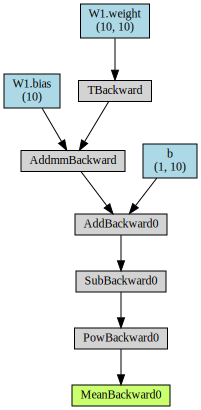


Graph nodes (BEFORE backprop):


,name,requires_grad,is_leaf,requires_grad & is_leaf,grad,grad_fn
0,x,False,True,False,None,None
1,b,True,True,True,None,None
2,W1.weight,True,True,True,None,None
3,W1.bias,True,True,True,None,None
4,y_pred,True,False,False,None,<AddBackward0 object at 0x7fcce587f790>
5,y,False,True,False,None,None
6,mse_loss,True,False,False,None,<MeanBackward0 object at 0x7fcce73d8250>



Graph nodes (AFTER backprop):


,name,requires_grad,is_leaf,requires_grad & is_leaf,grad,grad_fn
0,x,False,True,False,None,None
1,b,True,True,True,"tensor([[ 0.6085, -0.0233, 0.7450, 0.3725, ...",None
2,W1.weight,True,True,True,"tensor([[ 0.0000, 0.4248, 0.8497, 1.2745, ...",None
3,W1.bias,True,True,True,"tensor([ 0.6085, -0.0233, 0.7450, 0.3725, 0...",None
4,y_pred,True,False,False,None,<AddBackward0 object at 0x7fcce587f790>
5,y,False,True,False,None,None
6,mse_loss,True,False,False,None,<MeanBackward0 object at 0x7fcce73d8250>


In [178]:
torch.manual_seed(9)
model = Model()

y_pred = model(x)
mse_loss = mse(y_pred, y)

params_list = [("x", x)] + list(model.named_parameters()) + [("y_pred", y_pred), ("y", y), ("mse_loss", mse_loss)]

# Graph.
print("\nCalculation Graph, all the way to the loss:")
chart = make_dot(mse_loss, params=dict(params_list))
disp.display(chart)

# Graph node info.
print("\nGraph nodes (BEFORE backprop):")
df = show_state(params_list)
disp.display(df)

# --------------------------
# Do one run of backprop.
mse_loss.backward()

# Graph node info.
print("\nGraph nodes (AFTER backprop):")
df = show_state(params_list)
disp.display(df)

In [179]:
# Investigate `retain_graph`

torch.manual_seed(9)
model = Model()

y_pred = model(x)
mse_loss = mse(y_pred, y)

params_list = [("x", x)] + list(model.named_parameters()) + [("y_pred", y_pred), ("y", y), ("mse_loss", mse_loss)]

# Graph node info.
print("\nGraph nodes (BEFORE backprop):")
df = show_state(params_list)
disp.display(df)

# --------------------------
# Do TWO RUNS of backprop.
mse_loss.backward(retain_graph=True)
mse_loss.backward()

# The below causes an exception:
# mse_loss.backward()
# mse_loss.backward()

# All the above does is compute 1st order derivative twice and accumulate.
# NOT 2nd order derivatives.

# Graph node info.
print("\nGraph nodes (AFTER backprop):")
df = show_state(params_list)
disp.display(df)


Graph nodes (BEFORE backprop):


,name,requires_grad,is_leaf,requires_grad & is_leaf,grad,grad_fn
0,x,False,True,False,None,None
1,b,True,True,True,None,None
2,W1.weight,True,True,True,None,None
3,W1.bias,True,True,True,None,None
4,y_pred,True,False,False,None,<AddBackward0 object at 0x7fcce5e19a10>
5,y,False,True,False,None,None
6,mse_loss,True,False,False,None,<MeanBackward0 object at 0x7fcce5e19b50>



Graph nodes (AFTER backprop):


,name,requires_grad,is_leaf,requires_grad & is_leaf,grad,grad_fn
0,x,False,True,False,None,None
1,b,True,True,True,"tensor([[ 1.2171, -0.0465, 1.4900, 0.7451, ...",None
2,W1.weight,True,True,True,"tensor([[ 0.0000, 0.8497, 1.6994, 2.5491, ...",None
3,W1.bias,True,True,True,"tensor([ 1.2171, -0.0465, 1.4900, 0.7451, 0...",None
4,y_pred,True,False,False,None,<AddBackward0 object at 0x7fcce6a18cd0>
5,y,False,True,False,None,None
6,mse_loss,True,False,False,None,<MeanBackward0 object at 0x7fcce71c5090>



`mse_loss` graph:


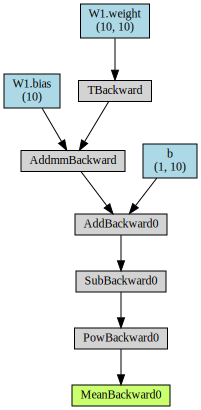


`model.W1.weight.grad` graph (after `backward()` with `create_graph=True`):


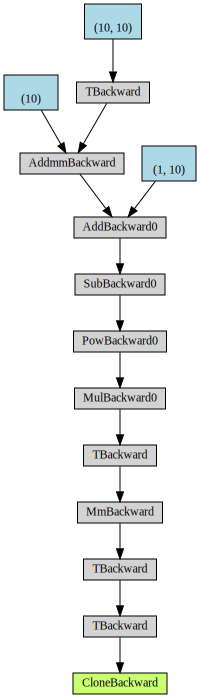

In [180]:
# Investigate `create_graph`

torch.manual_seed(9)
model = Model()

y_pred = model(x)
mse_loss = mse(y_pred, y)

params_list = [("x", x)] + list(model.named_parameters()) + [("y_pred", y_pred), ("y", y), ("mse_loss", mse_loss)]

# Graph.
print("\n`mse_loss` graph:")
chart = make_dot(mse_loss, params=dict(params_list))
disp.display(chart)

# --------------------------
# Do one run of backprop.
mse_loss.backward(retain_graph=True, create_graph=True)

# Can see that there's now a grath for model.W1.weight.**grad**
# Without create_graph=True, there is no graph there.
print("\n`model.W1.weight.grad` graph (after `backward()` with `create_graph=True`):")
W1w_grad = model.W1.weight.grad
chart = make_dot(W1w_grad)
disp.display(chart)

# Using `torch.autograd.grad()` 

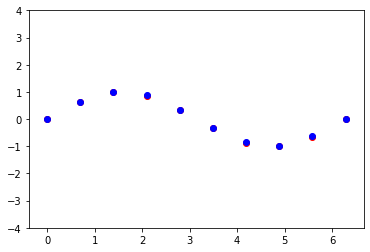

------------------------------
it 20:
------------------------------

>>> y_pred:
tensor([[ 0.0056,  0.6426,  0.9917,  0.8695,  0.3422, -0.3424, -0.8625, -0.9786,
         -0.6399, -0.0044]], grad_fn=<AddBackward0>)
>>> y:
tensor([[ 0.0000e+00,  6.4279e-01,  9.8481e-01,  8.6603e-01,  3.4202e-01,
         -3.4202e-01, -8.6603e-01, -9.8481e-01, -6.4279e-01, -2.4493e-16]])
>>> mse = 1.7112246496253647e-05


In [181]:
# Manually calculate and update gradients using autograd.

# Use `torch.autograd.grad()`.
# `torch.autograd.backward()` can be used as equivalent to calling `.backward()` on the loss.

VERB = False

torch.manual_seed(9)
model = Model()

x.requires_grad_(True)

iters = 20
lr = 0.01

for it in range(iters):
    
    print("------------------------------\nit {}:\n------------------------------\n".format(it + 1))
    
    # Zero the gradients.
    with torch.no_grad():
        for name, parameter in model.named_parameters():
            if parameter.grad is not None:
                parameter.grad.data.zero_()
    
    # Compute loss.
    y_pred = model(x)
    
    print(">>> y_pred:")
    print(y_pred)
    
    print(">>> y:")
    print(y)
    
    mse_loss = mse(y_pred, y)
    
    print(">>> mse = {}".format(mse_loss))
    
    # --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- 
    # Backprop.
    if VERB:
        print("-------------------")
        print("BEFORE UPDATE:")
        for p in model.parameters():
            print("parameter:")
            print(p)
            print("parameter.grad:")
            print(p.grad)
            print("----")
    
    params_list = list(model.parameters())
    # MANUALLY update the gradients (note that `only_inputs=True` no longer works in new PyTorch versions):
    grads = torch.autograd.grad(outputs=mse_loss, inputs=params_list, grad_outputs=torch.tensor(1.), retain_graph=False, create_graph=False)
    for idx, parameter in enumerate(params_list):
        if parameter.grad is None:  # Only relevant to the 0th iteration.
            parameter.grad = grads[idx]
        else:
            parameter.grad.data = grads[idx]
    
    if VERB:
        print("-------------------")
        print("AFTER UPDATE:")
        for p in model.parameters():
            print("parameter:")
            print(p)
            print("parameter.grad:")
            print(p.grad)
            print("----")
    # --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- 
        
    with torch.no_grad():  # Do not track.
        for name, parameter in model.named_parameters():
            parameter.data -= lr * parameter.grad.data
    
    # Display.
    show_plot(x_np, y_np, y_pred.squeeze().detach().numpy(), ylim=(-4., 4.), print_mse=False)
    if it < iters-1:
        disp.clear_output(wait=True)
        disp.display(plt.gcf())

plt.close()

# Higher order derivatives 

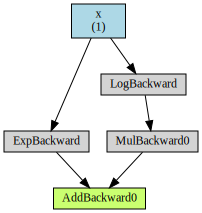


 f = 42.05778503417969. Expected: 42.05778...

 df_dx = 26.7522029876709. Expected: 26.75220...

 d2f_dx2 = 17.86331558227539. Expected: 17.8633...


In [218]:
# Simple 1D function:
x = torch.tensor([3.], requires_grad=True)
f = torch.exp(x) + 20 * torch.log(x)

# Show graph:
disp.display(make_dot(f, params={"x": x}))

print("\n f = {}. Expected: 42.05778...".format(f.item()))

# First order derivative wrt x: df/dx.
df_dx = torch.autograd.grad(outputs=f, inputs=x, grad_outputs=None, retain_graph=True, create_graph=True)[0]
print("\n df_dx = {}. Expected: 26.75220...".format(df_dx.item()))

# Second order derivative wrt x: d2f/dx2.
d2f_dx2 = torch.autograd.grad(outputs=df_dx, inputs=x, grad_outputs=None, retain_graph=False, create_graph=False)[0]
print("\n d2f_dx2 = {}. Expected: 17.8633...".format(d2f_dx2.item()))